In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Load dataset all_cars.csv yang telah Anda buat, simpan dalam variabel bernama ‘df_car’.
    - Jika ada kolom bernama 'Unnamed: 0', ubah nama kolom tersebut menjadi 'id'!
    - Jika tidak ada, lakukan reset index. Kemudian kolom paling kiri bernama 'index' ubah menjadi 'id'!

In [3]:
df_car = pd.read_csv('all_cars.csv')
df_car.reset_index().rename(columns={'index':'id'})
df_car.head()

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


2. Tampilkan deskripsi statistik dari dataset df_car.

In [4]:
display(df_car.describe())
display(df_car.describe(exclude='number'))

,year,price,mileage,tax,mpg,engineSize
count,22266.000000,22266.000000,22266.000000,22266.000000,22266.000000,22266.000000
mean,2016.995509,17542.591575,23501.863604,115.473592,55.151181,1.688489
std,2.133576,10589.835312,21111.157417,68.835239,14.834181,0.566379
min,1997.000000,850.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,9999.000000,7200.000000,30.000000,44.800000,1.400000
50%,2017.000000,14999.000000,18354.000000,145.000000,55.400000,1.600000
75%,2019.000000,21991.000000,33100.750000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,256.800000,6.300000


,brand,model,transmission,fuelType
count,22266,22266,22266,22266
unique,3,60,4,4
top,Audi,Yaris,Manual,Petrol
freq,10668,2122,11806,12052


3. Kita mengenal bahwa Variabel dibagi menjadi 2, yaitu variabel Kualitatif dan Kuantitatif. Var. Kualitatif dibagi menjadi 2, yaitu: Nominal dan Ordinal. 
Var. Kualitatif dibagi menjadi 2, yaitu: Continue dan Discrete

    - Kolom mana saja yang menurut Anda merupakan var. kualitatif? Mana yang Nominal dan Ordinal?
    - Kolom mana saja yang menurut Anda merupakan var. kuantitatif? Mana yang Continue dan Discrete?

In [5]:
# qualitative
nominal = 'brand, model, transmission, fueltype'
ordinal = '-'
# quantitative
continu = 'price, mileage, mpg, tax, engineSize'
discrete = 'year'
print(f'Variabel Kualitatif\n\tNominal\t: {nominal}\n\tOrdinal\t: {ordinal}')
print(f'Variabel Kuantitatif\n\tContinue: {continu}\n\tDiscrete: {discrete}')

Variabel Kualitatif
	Nominal	: brand, model, transmission, fueltype
	Ordinal	: -
Variabel Kuantitatif
	Continue: price, mileage, mpg, tax, engineSize
	Discrete: year


4. Apa yg dimaksud dengan Measure of Central Tendency? Tampilkan Measure of Central Tendency dari kolom 'model' dan 'price'!Central Tendency apa yang cocok untuk kolom 'model' dan 'price'?

In [6]:
from scipy.stats import shapiro, normaltest

display(df_car['model'].mode()[0]) #menggunakan modus karena data kualitatif

#Cek distribusi data
df_car['price'].count() # N = 22,266


#shapiro(df_car['price']) ##Shapiro Wilk Test -> p-value may not be accurate for N > 5000


#If the P-Value of the D'Agostino-Pearson Test is larger than 0.05, we assume a normal distribution
#If the P-Value of the D'Agostino-Pearson Test is smaller than 0.05, we do not assume a normal distribution
result = normaltest(df_car['price']) 
print("price p-value using median: {:.5f}".format(result.pvalue)) #D'Agostino-Pearson -> pvalue -> 0 -> not normal distrib. -> use median

display(df_car['price'].median())



'Yaris'

price p-value using median: 0.00000


14999.0

5. Apa yang dimaksud dengan Measure of Spread? Tampilkan Measure of Spread dari kolom 'price'!

In [7]:
describePrice = df_car['price'].describe()

print(f'''
    Range               = {describePrice['max']-describePrice['min']}
    Standar Deviation   = {describePrice['std']}
    Q2                  = {describePrice['50%']}
    Q1                  = {describePrice['25%']}
    Q3                  = {describePrice['75%']}
    IQR                 = {describePrice['75%']-describePrice['25%']}
''')


    Range               = 144150.0
    Standar Deviation   = 10589.835311802195
    Q2                  = 14999.0
    Q1                  = 9999.0
    Q3                  = 21991.0
    IQR                 = 11992.0



6. Apakah ada Outlier pada kolom 'price'? Kalau ada, berapa banyak data yang merupakan outliers?

In [8]:
#An observation considered outlier if the value:
# below Q1 - 1.5 x IQR
# above Q3 + 1.5 x IQR
belowOut = describePrice['25%'] - (1.5*(describePrice['75%']-describePrice['25%']))
aboveOut = describePrice['75%'] + (1.5*(describePrice['75%']-describePrice['25%']))
Outlier = df_car[(df_car['price']<belowOut) | (df_car['price']>aboveOut)]
print(f'Jumlah Outlier: {len(Outlier)}')

Jumlah Outlier: 808


7. Variabel/kolom apa saja yang memiliki distribusi skewed ke kanan?

In [15]:
for i in df_car:
    try:
        if df_car[i].mean() > df_car[i].median():
            print(f'{i} variable has a right-skewed distribution')
        else:
            print(f'{i} variable does not has a right-skewed distribution')
    except:
        pass


year variable does not has a right-skewed distribution
price variable has a right-skewed distribution
mileage variable has a right-skewed distribution
tax variable does not has a right-skewed distribution
mpg variable does not has a right-skewed distribution
engineSize variable has a right-skewed distribution


8. Nilai Mean dan Median dari kolom 'mileage' berbeda jauh. Coba buktikan apakah kolom tersebut terdistribusi normal atau tidak!

In [9]:
display(df_car['mileage'].mean())
display(df_car['mileage'].median())

resultMileAge = normaltest(df_car['price']) 
print("price p-value using median: {:.5f}".format(resultMileAge.pvalue)) #D'Agostino-Pearson -> pvalue -> 0.00 -> not normal distrib. -> use median


23501.86360370071

18354.0

price p-value using median: 0.00000


9. Grafik apa yang cocok untuk menampilkan visualisasi:
    - brand vs price
    - price vs mileage
    - frequency distribution of mileage

<function matplotlib.pyplot.show(close=None, block=None)>

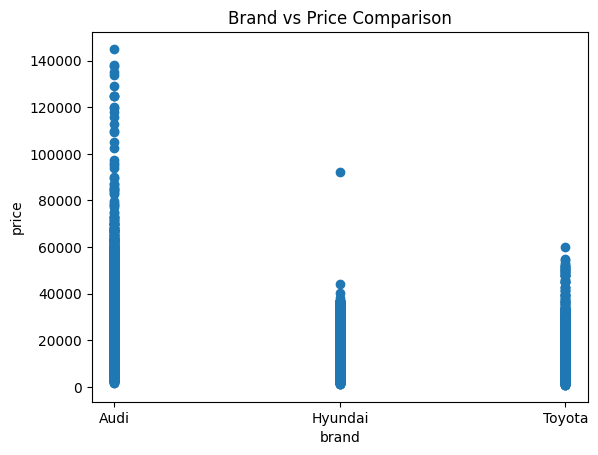

In [10]:
brandprice = plt.scatter(df_car['brand'],df_car['price'])
plt.xlabel('brand')
plt.ylabel('price')
plt.title('Brand vs Price Comparison')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

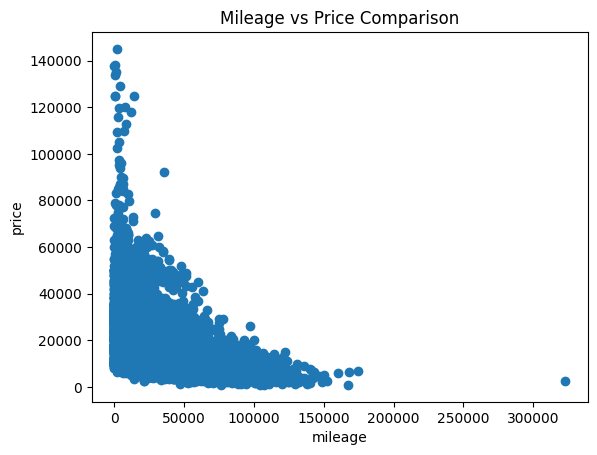

In [11]:
plt.scatter(df_car['mileage'],df_car['price'])
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('Mileage vs Price Comparison')
plt.show

(array([1.6468e+04, 4.6640e+03, 9.2600e+02, 1.7600e+02, 2.8000e+01,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.000000e+00, 3.230090e+04, 6.460080e+04, 9.690070e+04,
        1.292006e+05, 1.615005e+05, 1.938004e+05, 2.261003e+05,
        2.584002e+05, 2.907001e+05, 3.230000e+05]),
 <BarContainer object of 10 artists>)

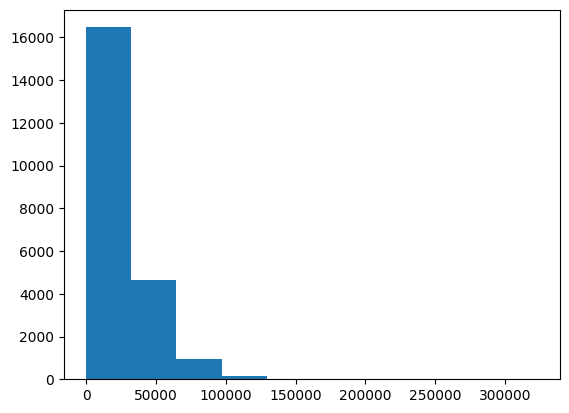

In [12]:
plt.hist(df_car['mileage'])